# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import joblib

# Importing and exploring dataset

In [3]:
df= pd.read_csv('reg_cars_selling.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

# 1. name

In [8]:
df['name'].nunique()

2058

In [9]:
df['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

# Observations:

Based on the above we can see that the number of unique values in the column are too much to be encoded and used as is, so instead we will extract the make and model from the column and ignore the rest of the data.

ex: 
 make = Honda
,  model = City

# 2. year

In [12]:
df['year'].nunique()

29

In [13]:
df['year'].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2002, 2015, 2018, 2003, 2019, 2008, 2020, 1999, 2000, 1983,
       2004, 1996, 1994, 1995, 1998, 1997, 1991], dtype=int64)

In [14]:
df['year'].describe()

count    8128.000000
mean     2013.804011
std         4.044249
min      1983.000000
25%      2011.000000
50%      2015.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

In [15]:
df['year'].mode()

0    2017
Name: year, dtype: int64

# Observations: 

Based on the above we can see that the oldest car is a 1983 model and the newest car is 2020 but most cars were made in 2017.

# 3. selling price

In [18]:
df['selling_price'].describe()

count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

# Observations:

based on the above, we can see that the least selling price was 29999 (twenty-nine thousand nine hundred ninety-nine ) and the maximum selling price is 1000000 (ten million) while the mean is 638271 (six hundred thirty-eight thousand two hundred seventy-one).

# 4. kilometers driven

In [21]:
df['km_driven'].describe()

count    8.128000e+03
mean     6.981951e+04
std      5.655055e+04
min      1.000000e+00
25%      3.500000e+04
50%      6.000000e+04
75%      9.800000e+04
max      2.360457e+06
Name: km_driven, dtype: float64

# Observations:

Based on the above we can see that the minimum distance driven is 1km and the maximum distance is 2360457 (two million three hundred sixty thousand four hundred fifty-seven). The maximum number here doesn't make much since and will probably be removed once we handle outliers.

# 5. fuel

In [24]:
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

Observations:

Based on the above, we can see that while there are  4 different unique values in this column, the most commonly used fuel type is Diesel and the least used is LPG

# 6. seller type

In [28]:
df['seller_type'].value_counts()

seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64

# Observations:

based on the aboce, we can see that the most sellers in the dataset are individual sellers, there are over a 1000 dealers but only 236 trustmark dealers.

# 7. transmission

In [41]:
df['transmission'].value_counts()

transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64

# Observations:

Based on the above, we can see that most cars in the dataset are manual. The data distribution on this column is extremley unbalanced.

# 8. owner

In [48]:
df['owner'].value_counts()

owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64

# Observations:

Based on the above, we can see that most sellers are first owners of their cars, while there are only 5 test drive cars.

# 9. mileage

In [51]:
df['mileage'].head()

0     23.4 kmpl
1    21.14 kmpl
2     17.7 kmpl
3     23.0 kmpl
4     16.1 kmpl
Name: mileage, dtype: object

In [53]:
df['mileage'].describe()

count          7907
unique          393
top       18.9 kmpl
freq            225
Name: mileage, dtype: object

# Observations:

Based on the above, we can see that this column contains both numerical and text data types, which we will need to change so the data could be used for machine learning purposes. There are also some missing values in this column that we will need to handle.

# 10. engine

In [59]:
df['engine'].head()

0    1248 CC
1    1498 CC
2    1497 CC
3    1396 CC
4    1298 CC
Name: engine, dtype: object

In [61]:
df['engine'].describe()

count        7907
unique        121
top       1248 CC
freq         1017
Name: engine, dtype: object

# Observations: 

Based on the above, we can see that this column contains both numerical and text data types, which we will need to change so the data could be used for machine learning purposes. There are also some missing values in this column that we will need to handle.

# 11. maximum power

In [65]:
df['max_power'].head()

0        74 bhp
1    103.52 bhp
2        78 bhp
3        90 bhp
4      88.2 bhp
Name: max_power, dtype: object

In [67]:
df['max_power'].describe()

count       7913
unique       322
top       74 bhp
freq         377
Name: max_power, dtype: object

# Observations:

Based on the above, we can see that this column contains both numerical and text data types, which we will need to change so the data could be used for machine learning purposes. There are also some missing values in this column that we will need to handle.

# 12. torque

In [71]:
df['torque'].nunique()

441

In [73]:
df['torque'].unique()

array(['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm', '12.7@ 2,700(kgm@ rpm)',
       '22.4 kgm at 1750-2750rpm', '11.5@ 4,500(kgm@ rpm)',
       '113.75nm@ 4000rpm', '7.8@ 4,500(kgm@ rpm)', '59Nm@ 2500rpm',
       '170Nm@ 1800-2400rpm', '160Nm@ 2000rpm', '248Nm@ 2250rpm',
       '78Nm@ 4500rpm', nan, '84Nm@ 3500rpm', '115Nm@ 3500-3600rpm',
       '200Nm@ 1750rpm', '62Nm@ 3000rpm', '219.7Nm@ 1500-2750rpm',
       '114Nm@ 3500rpm', '115Nm@ 4000rpm', '69Nm@ 3500rpm',
       '172.5Nm@ 1750rpm', '6.1kgm@ 3000rpm', '114.7Nm@ 4000rpm',
       '60Nm@ 3500rpm', '90Nm@ 3500rpm', '151Nm@ 4850rpm',
       '104Nm@ 4000rpm', '320Nm@ 1700-2700rpm', '250Nm@ 1750-2500rpm',
       '145Nm@ 4600rpm', '146Nm@ 4800rpm', '343Nm@ 1400-3400rpm',
       '200Nm@ 1400-3400rpm', '200Nm@ 1250-4000rpm',
       '400Nm@ 2000-2500rpm', '138Nm@ 4400rpm', '360Nm@ 1200-3400rpm',
       '200Nm@ 1200-3600rpm', '380Nm@ 1750-2500rpm', '173Nm@ 4000rpm',
       '400Nm@ 1750-3000rpm', '400Nm@ 1400-2800rpm',
       '200Nm@ 1750-3000rp

In [75]:
df['torque'].describe()

count               7906
unique               441
top       190Nm@ 2000rpm
freq                 530
Name: torque, dtype: object

# Observations:

Based on the above, we can see that the data format in this column is not uniform and includes both numerical and text data types. It contains 3 different values: Nm for neuton meter, rpm for revolution per minute and kgm which is another unit of measurement equivalent to Nm. To handle this we will need to extract each value seperately into 2 different column nm/ kgm and rpm.

# 13. seats

In [79]:
df['seats'].describe()

count    7907.000000
mean        5.416719
std         0.959588
min         2.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: seats, dtype: float64

In [81]:
df['seats'].mode()

0    5.0
Name: seats, dtype: float64

# Observations:

Based on the above we can see that the minimum number of seats in a car on this dataset is 2 and the maximum is 14. But most cars are 5 seats

# Column handling 

For the purposes of using multiple data analysis tools studied as part of the Kayfa scholarship in data science, I chose to perform this part of the data analysis process using PowerQuery. 

# name:
I used the column split function with space as a delimeter. I then labeled the first of the split columns as a make, the second as a model, and removed the rest. The only make in the data where this did not work was 'Land Rover', but luckily there were only 4 rows, so I was able to handle them manually on Excel.

# mileage, engine, and max_power: 
I used the column split function with Digit to Non-Digit instead of a delimeter. I then kept the digit values and removed the texts.

# torque: 
The data in this column were not uniform, so I used the column split function with Digit to Non-Digit at the start and then handled each case individually. 

Case 1- decimal numbers: because the data type is text, the values after the delimeter were not split in the previous step. To solve this, I created a conditional column containing only the values begining with a decimal point. I then removed the decimal point using trim function, and merged this new column with the original numerical column with (.) as a seperator. I finally removed the (.) from numbers that were not decimal using trim function .

Case 2- two values given for rpm: followed the same steps as the previous case with the dash seperating the values, but instead of merging them in a column normally used the statiscal function to create a column with the average of these two values.

I finally, relabled the new columns as Nm/kgm and rpm.

# country:
I created another column based on my research to specify the country of origin of each make as an extra feature.

# Importing the updated dataset

In [86]:
updated_df = pd.read_csv('reg_car_selling_updated.csv')

In [88]:
updated_df.head()

,make,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Nm/kgm,rpm,seats,country
0,Maruti,Swift,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,NaN,5.0,India
1,Skoda,Rapid,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,2500.0,5.0,Czech Republic
2,Honda,City,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,12.1,2700.0,5.0,Japan
3,Hyundai,i20,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.0,2250.0,5.0,South Korea
4,Maruti,Swift,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,11.0,4500.0,5.0,India


In [90]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8128 non-null   object 
 1   model          8128 non-null   object 
 2   year           8128 non-null   int64  
 3   selling_price  8128 non-null   int64  
 4   km_driven      8128 non-null   int64  
 5   fuel           8128 non-null   object 
 6   seller_type    8128 non-null   object 
 7   transmission   8128 non-null   object 
 8   owner          8128 non-null   object 
 9   mileage        7907 non-null   float64
 10  engine         7907 non-null   float64
 11  max_power      7912 non-null   float64
 12  Nm/kgm         7906 non-null   float64
 13  rpm            3759 non-null   float64
 14  seats          7907 non-null   float64
 15  country        8122 non-null   object 
dtypes: float64(6), int64(3), object(7)
memory usage: 1016.1+ KB


# Handling missing values

In [93]:
updated_df.isnull().sum()

make                0
model               0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           221
engine            221
max_power         216
Nm/kgm            222
rpm              4369
seats             221
country             6
dtype: int64

Filling missing values with mean 

In [96]:
updated_df.fillna({'mileage': updated_df['mileage'].mean()}, inplace=True)
updated_df.fillna({'engine': updated_df['engine'].mean()}, inplace=True)
updated_df.fillna({'max_power': updated_df['max_power'].mean()}, inplace=True)
updated_df.fillna({'Nm/kgm': updated_df['Nm/kgm'].mean()}, inplace=True)
updated_df.fillna({'rpm': updated_df['rpm'].mean()}, inplace=True)
updated_df.fillna({'seats': updated_df['seats'].mean()}, inplace=True)

In [98]:
updated_df.isnull().sum()

make             0
model            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
Nm/kgm           0
rpm              0
seats            0
country          6
dtype: int64

# Handling duplicated values

In [101]:
updated_df.duplicated().sum()

1220

In [103]:
updated_df[updated_df.duplicated(keep=False)].sort_values('make')

,make,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,Nm/kgm,rpm,seats,country
1977,Audi,Q3,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,380.0,2500.000000,5.0,Germany
131,Audi,Q5,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,400.0,3000.000000,5.0,Germany
5245,Audi,Q5,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,400.0,3000.000000,5.0,Germany
7324,Audi,Q3,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,380.0,2500.000000,5.0,Germany
3236,Audi,Q5,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,400.0,3000.000000,5.0,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252,Volvo,V40,2018,2475000,2000,Diesel,Dealer,Automatic,First Owner,16.80,1984.0,150.00,350.0,2750.000000,5.0,Sweden
5087,Volvo,XC40,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400.0,2811.091248,5.0,Sweden
4259,Volvo,XC40,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,400.0,2811.091248,5.0,Sweden
4833,Volvo,V40,2018,2475000,2000,Diesel,Dealer,Automatic,First Owner,16.80,1984.0,150.00,350.0,2750.000000,5.0,Sweden


Dropping duplicated values

In [106]:
updated_df= updated_df.drop_duplicates()

In [108]:
updated_df.duplicated().sum()

0

# Handling outliers

# Numerical data

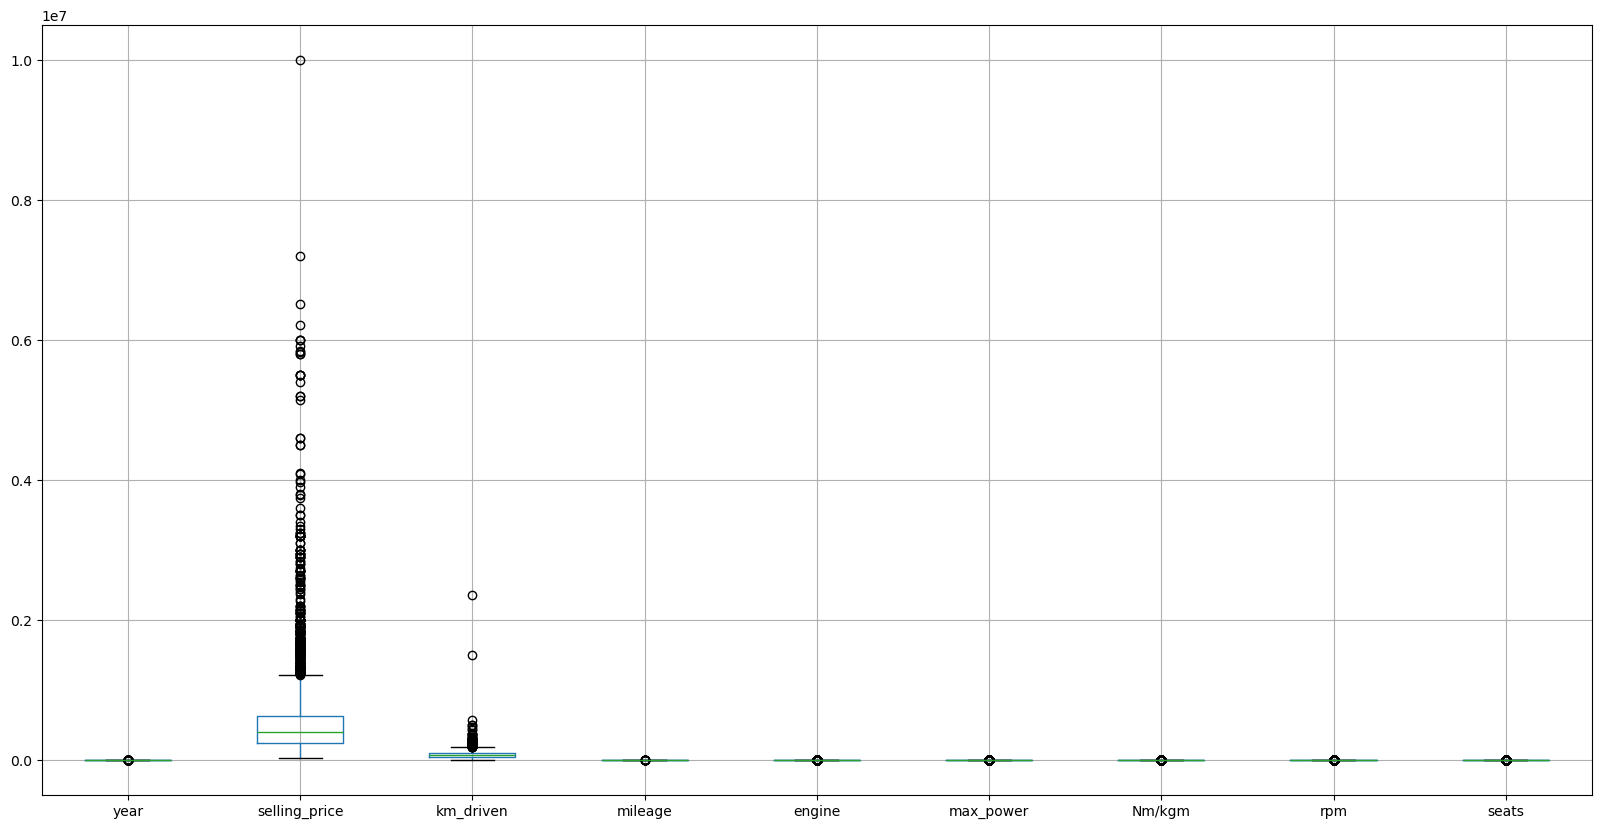

In [112]:
updated_df.boxplot(figsize = (20,10))
plt.show()

# 1. Selling price

In [114]:
price_statistics = updated_df['selling_price'].describe()
price_statistics

count    6.908000e+03
mean     5.180221e+05
std      5.225202e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.000000e+05
75%      6.350000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

In [115]:
Q1 = price_statistics['25%']
Q3 = price_statistics['75%']
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

Removing selling price outliers using IQR

In [120]:
updated_df= updated_df[(updated_df['selling_price'] >= lower_bound) & (updated_df['selling_price'] <= upper_bound)]

# 2. Kilometers driven

In [123]:
km_statistics = updated_df['km_driven'].describe()
km_statistics

count    6.580000e+03
mean     7.531601e+04
std      5.899026e+04
min      1.000000e+00
25%      4.000000e+04
50%      7.000000e+04
75%      1.000000e+05
max      2.360457e+06
Name: km_driven, dtype: float64

In [125]:
Q1_1 = km_statistics['25%']
Q3_1 = km_statistics['75%']
IQR_1 = Q3_1 - Q1_1
lower_bound1 = Q1_1 - (1.5 * IQR_1)
upper_bound1 = Q3_1 + (1.5 * IQR_1)

Removing kilometer driven outliers using IQR

In [128]:
updated_df= updated_df[(updated_df['km_driven'] >= lower_bound1) & (updated_df['km_driven'] <= upper_bound1)]

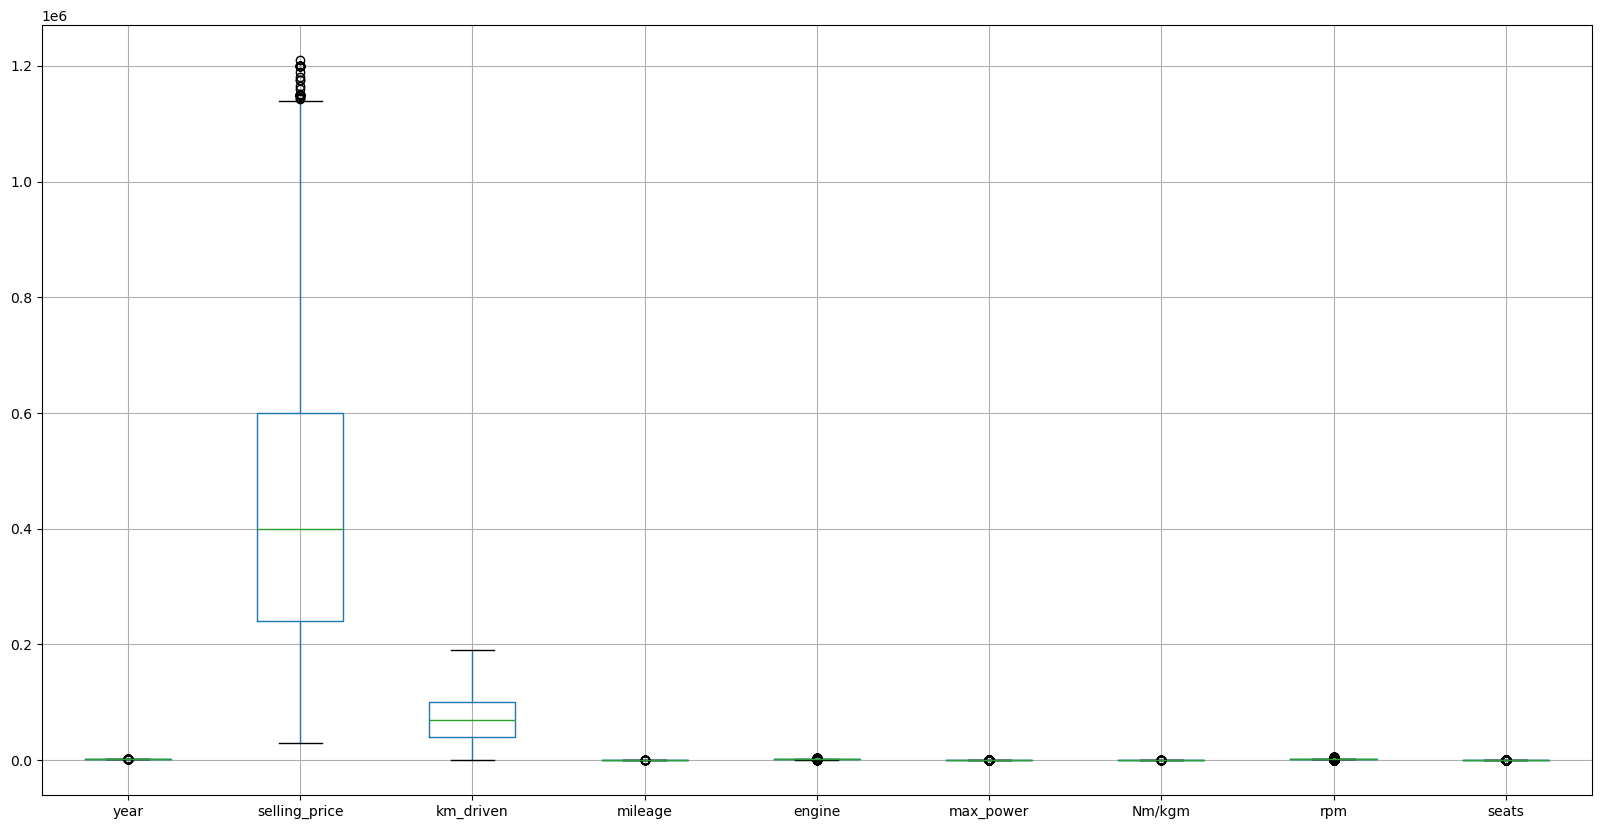

In [130]:
updated_df.boxplot(figsize = (20,10))
plt.show()

# Categorical data

# 1. make

In [134]:
updated_df['make'].value_counts()

make
Maruti           2140
Hyundai          1238
Mahindra          652
Tata              611
Honda             349
Ford              347
Toyota            220
Chevrolet         206
Renault           200
Volkswagen        167
Nissan             72
Skoda              61
Datsun             57
Fiat               43
BMW                15
Mercedes-Benz      10
Mitsubishi          6
Force               4
Audi                4
Ambassador          4
Daewoo              3
Kia                 1
Volvo               1
Opel                1
Peugeot             1
Isuzu               1
Name: count, dtype: int64

dropping makes were value count is less than 10 

In [137]:
updated_df = updated_df[updated_df.groupby('make').make.transform('count')>10]

# 2. model

In [140]:
updated_df['model'].value_counts()

model
Swift       662
Alto        388
i20         297
Wagon       240
Bolero      176
           ... 
7             1
Willys        1
Ingenio       1
Teana         1
S-Presso      1
Name: count, Length: 156, dtype: int64

 dropping models were value count is less than 10

In [143]:
updated_df = updated_df[updated_df.groupby('model').model.transform('count')>10]

# Other columns

In [145]:
updated_df['fuel'].value_counts()

fuel
Diesel    3093
Petrol    2888
CNG         55
LPG         37
Name: count, dtype: int64

In [147]:
updated_df['seller_type'].value_counts()

seller_type
Individual          5538
Dealer               513
Trustmark Dealer      22
Name: count, dtype: int64

In [149]:
updated_df['transmission'].value_counts()

transmission
Manual       5764
Automatic     309
Name: count, dtype: int64

In [151]:
updated_df['owner'].value_counts()

owner
First Owner             3712
Second Owner            1736
Third Owner              475
Fourth & Above Owner     150
Name: count, dtype: int64

 keeping the rest of the columns as is

In [155]:
updated_df = updated_df.reset_index(drop=True)

In [157]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6073 entries, 0 to 6072
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           6073 non-null   object 
 1   model          6073 non-null   object 
 2   year           6073 non-null   int64  
 3   selling_price  6073 non-null   int64  
 4   km_driven      6073 non-null   int64  
 5   fuel           6073 non-null   object 
 6   seller_type    6073 non-null   object 
 7   transmission   6073 non-null   object 
 8   owner          6073 non-null   object 
 9   mileage        6073 non-null   float64
 10  engine         6073 non-null   float64
 11  max_power      6073 non-null   float64
 12  Nm/kgm         6073 non-null   float64
 13  rpm            6073 non-null   float64
 14  seats          6073 non-null   float64
 15  country        6073 non-null   object 
dtypes: float64(6), int64(3), object(7)
memory usage: 759.3+ KB


In [177]:
updated_df.to_csv('reg_cars_selling_final.csv', index=False)

# Notes:

After handling missing values and dropping outliers, we can see that we have lost some of the data, but this should allow our machine learning algorithm to deliver better results later.